In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Processed/Processed3/cleaned_output_addcolumns_final_merged_cleaned_questions.csv'
df_clean = pd.read_csv(file_path, header = 0)
df_clean = df_clean.dropna()
print(df_clean.shape)
print(list(df_clean.columns))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(534820, 12)
['Id', 'CommentCount', 'ViewCount', 'Tags', 'code_snippet', 'question_line_count', 'code_line_count', 'image', 'pd_score', 'Reputation', 'ReputationCategory', 'answered?']


In [11]:
df_clean.head()

,Id,CommentCount,ViewCount,Tags,code_snippet,question_line_count,code_line_count,image,pd_score,Reputation,ReputationCategory,answered?
0,9134650,5,3121.0,|reactjs|sql|database|combinations|,0,38,0,0,0.160205,123.0,Low,1
1,15930661,0,112229.0,|javascript|react-native|highcharts|,0,9,0,0,0.012474,2173.0,Mid,1
2,15747536,5,1395.0,|javascript|reactjs|,1,27,22,0,0.071685,93.0,Low,1
3,16642259,3,32710.0,|javascript|design-patterns|reactjs|single-pag...,0,9,0,0,0.003057,2020.0,Mid,1
4,17248504,2,23631.0,|javascript|facebook|jslint|jshint|reactjs|,1,13,8,0,0.029622,4184.0,High,1


In [12]:
df_clean['answered?'].value_counts()

,count
answered?,
1,429347
0,105473


In [13]:
df_clean.describe()

,Id,CommentCount,ViewCount,code_snippet,question_line_count,code_line_count,image,pd_score,Reputation,answered?
count,5.348200e+05,534820.000000,5.348200e+05,534820.000000,534820.000000,534820.000000,534820.000000,534820.000000,5.348200e+05,534820.000000
mean,6.152046e+07,1.620648,2.910352e+03,0.878647,50.992059,42.129754,0.131940,0.560958,2.149911e+03,0.802788
std,1.151463e+07,2.305250,1.864710e+04,0.326537,58.101566,55.596214,0.338426,1.081086,9.330383e+03,0.397894
min,9.134650e+06,0.000000,4.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000e+00,0.000000
25%,5.380260e+07,0.000000,1.270000e+02,1.000000,16.000000,8.000000,0.000000,0.019785,5.300000e+01,1.000000
50%,6.330811e+07,1.000000,4.970000e+02,1.000000,35.000000,26.000000,0.000000,0.118064,2.730000e+02,1.000000
75%,7.102667e+07,2.000000,1.546000e+03,1.000000,65.000000,55.000000,0.000000,0.493036,1.207000e+03,1.000000
max,7.825299e+07,41.000000,2.769428e+06,1.000000,1664.000000,1658.000000,1.000000,16.666667,1.054815e+06,1.000000


<ipython-input-14-42d47bc7d65f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='answered?', data=df_clean, palette='hls')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
<ipython-input-14-42d47bc7d65f>:7: UserWarning: FixedFormatter should only be used together with Fixed

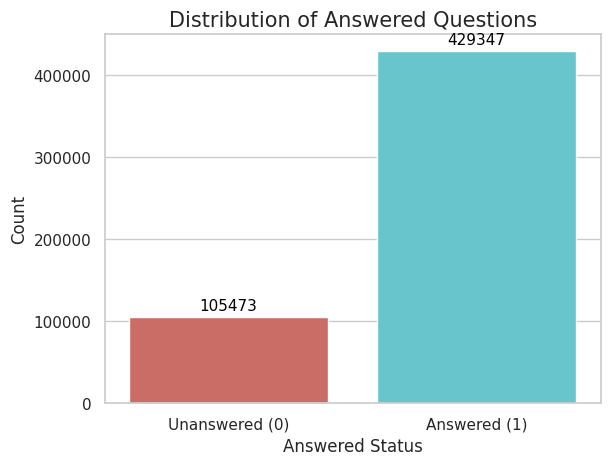

<Figure size 640x480 with 0 Axes>

In [14]:
sns.set_style("whitegrid")
plot = sns.countplot(x='answered?', data=df_clean, palette='hls')

plot.set_xlabel('Answered Status', fontsize=12)
plot.set_ylabel('Count', fontsize=12)

plot.set_xticklabels(['Unanswered (0)', 'Answered (1)'])

plot.set_title('Distribution of Answered Questions', fontsize=15)

for p in plot.patches:
    plot.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                  textcoords='offset points')
plt.show()

plt.savefig('count_plot.png')

In [15]:
count_no_sub = len(df_clean[df_clean['answered?']==0])
count_sub = len(df_clean[df_clean['answered?']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of non-answered: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of answered: ", pct_of_sub*100)

percentage of non-answered:  19.721214614262742
percentage of answered:  80.27878538573727


In [16]:
numeric_cols = df_clean.select_dtypes(include=['number']).columns

df_mean = df_clean.groupby('answered?')[numeric_cols].mean()
print(df_mean)

                     Id  CommentCount    ViewCount  code_snippet  \
answered?                                                          
0          6.464309e+07      2.375139   422.045339      0.846548   
1          6.075335e+07      1.435301  3521.627057      0.886532   

           question_line_count  code_line_count     image  pd_score  \
answered?                                                             
0                    54.095342        45.294910  0.142785  0.000000   
1                    50.229709        41.352205  0.129275  0.698762   

            Reputation  answered?  
answered?                          
0          1545.370152        0.0  
1          2298.421817        1.0  


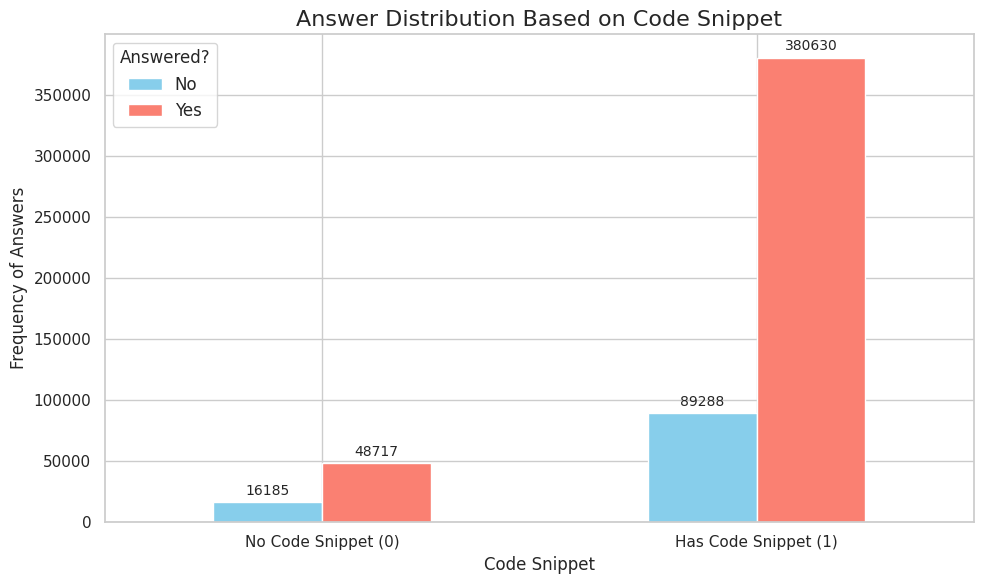

In [17]:
%matplotlib inline

sns.set_style("whitegrid")

table_x1 = pd.crosstab(df_clean['code_snippet'], df_clean['answered?'])

ax = table_x1.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Answer Distribution Based on Code Snippet', fontsize=16)
plt.xlabel('Code Snippet', fontsize=12)
plt.ylabel('Frequency of Answers', fontsize=12)

ax.set_xticklabels(['No Code Snippet (0)', 'Has Code Snippet (1)'], rotation=0)

plt.legend(title='Answered?', labels=['No', 'Yes'], fontsize=12, title_fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()

plt.savefig('answer_distribution_based_on_code_snippet.png', dpi=300)

plt.show()

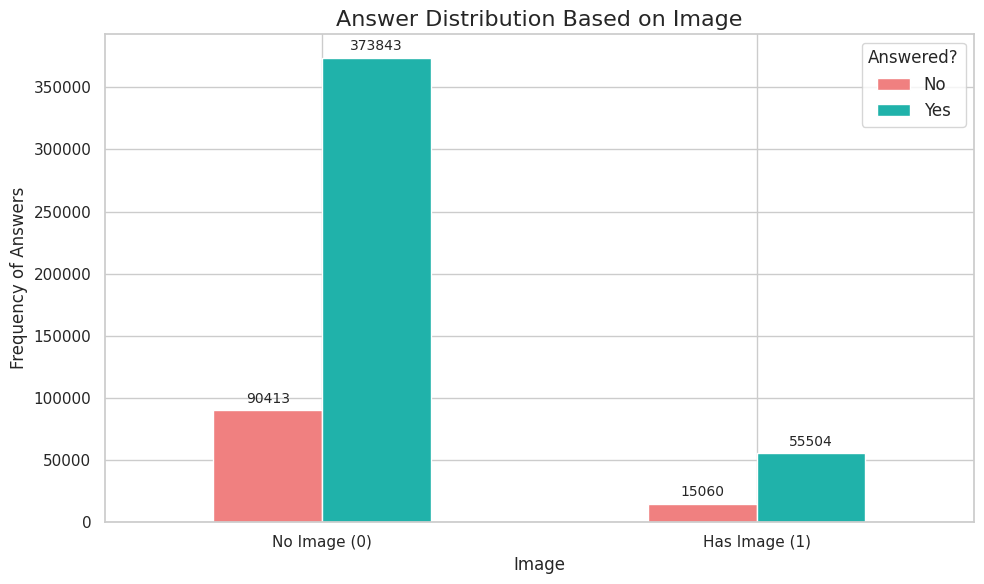

In [18]:
sns.set_style("whitegrid")

table_x2 = pd.crosstab(df_clean['image'], df_clean['answered?'])

ax = table_x2.plot(kind='bar', figsize=(10, 6), color=['lightcoral', 'lightseagreen'])

plt.title('Answer Distribution Based on Image', fontsize=16)
plt.xlabel('Image', fontsize=12)
plt.ylabel('Frequency of Answers', fontsize=12)

ax.set_xticklabels(['No Image (0)', 'Has Image (1)'], rotation=0)

plt.legend(title='Answered?', labels=['No', 'Yes'], fontsize=12, title_fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()

plt.savefig('answer_distribution_based_on_image.png', dpi=300)

plt.show()

In [19]:
df_clean['log_Reputation'] = np.log1p(df_clean['Reputation'])  # log(1 + Reputation) untuk menghindari log(0)
df_clean['sqrt_question_line_count'] = np.sqrt(df_clean['question_line_count'])
df_clean['sqrt_code_line_count'] = np.sqrt(df_clean['code_line_count'])

<ipython-input-20-db9400c85ac9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered?', y='log_Reputation', data=df_subset, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to

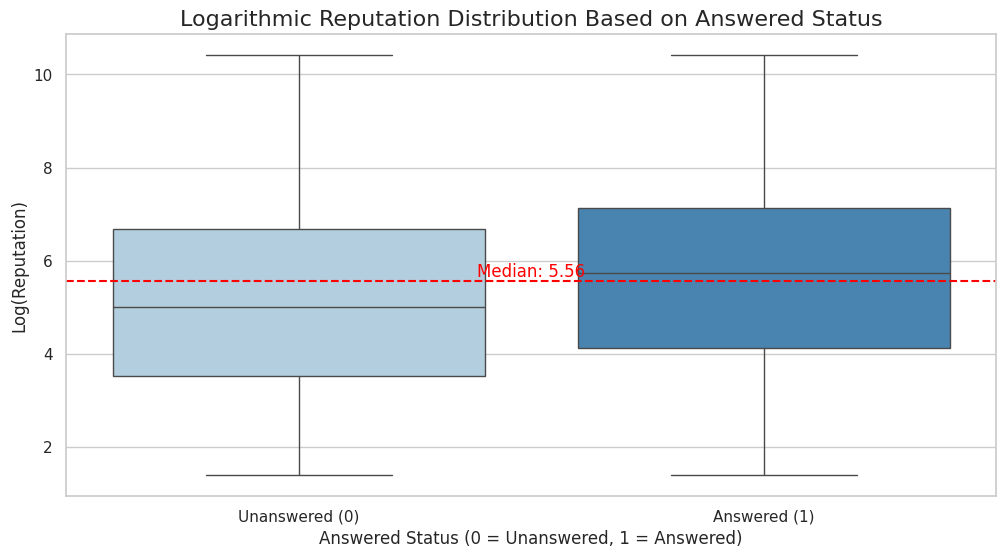

In [20]:
q99 = df_clean['log_Reputation'].quantile(0.99)
df_subset = df_clean[df_clean['log_Reputation'] <= q99]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(x='answered?', y='log_Reputation', data=df_subset, palette='Blues')

plt.legend([], [], frameon=False)

plt.title('Logarithmic Reputation Distribution Based on Answered Status', fontsize=16)
plt.xlabel('Answered Status (0 = Unanswered, 1 = Answered)', fontsize=12)
plt.ylabel('Log(Reputation)', fontsize=12)

median_log_reputation = df_subset['log_Reputation'].median()
plt.axhline(median_log_reputation, color='red', linestyle='--', label='Median Log(Reputation)')

plt.text(0.5, median_log_reputation + 0.1, f'Median: {median_log_reputation:.2f}', color='red', fontsize=12, ha='center')

plt.xticks([0, 1], ['Unanswered (0)', 'Answered (1)'])

plt.savefig('answer_distribution_based_on_log_reputation.png', dpi=300)

plt.show()

<ipython-input-21-94c605faa207>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['log_Reputation'])


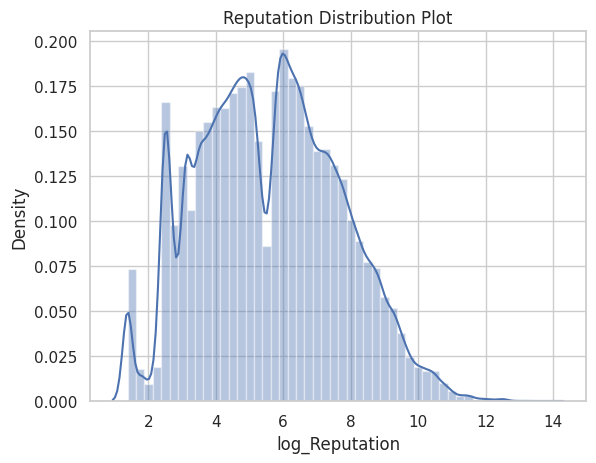

In [21]:
plt.title('Reputation Distribution Plot')
sns.distplot(df_clean['log_Reputation'])
plt.show()

<ipython-input-22-58c9d273eb79>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered?', y='CommentCount', data=df_clean, palette='deep')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get

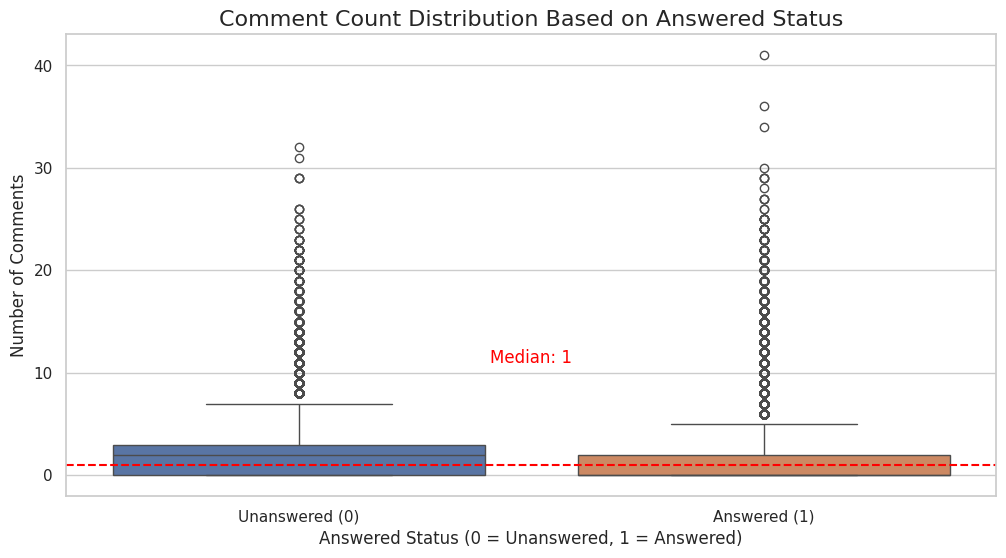

In [22]:
q99 = df_clean['CommentCount'].quantile(0.99)
df_subset = df_clean[df_clean['CommentCount'] <= q99]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(x='answered?', y='CommentCount', data=df_clean, palette='deep')

plt.legend([], [], frameon=False)

plt.title('Comment Count Distribution Based on Answered Status', fontsize=16)
plt.xlabel('Answered Status (0 = Unanswered, 1 = Answered)', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)

median_comment_count = df_subset['CommentCount'].median()
plt.axhline(median_comment_count, color='red', linestyle='--', label='Median Comment Count')

plt.text(0.5, median_comment_count + 10, f'Median: {median_comment_count:.0f}', color='red', fontsize=12, ha='center')

plt.xticks([0, 1], ['Unanswered (0)', 'Answered (1)'])

plt.savefig('boxplot_commentcount.png', dpi=300)

plt.show()

<ipython-input-23-8caa1a44c566>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['CommentCount'])


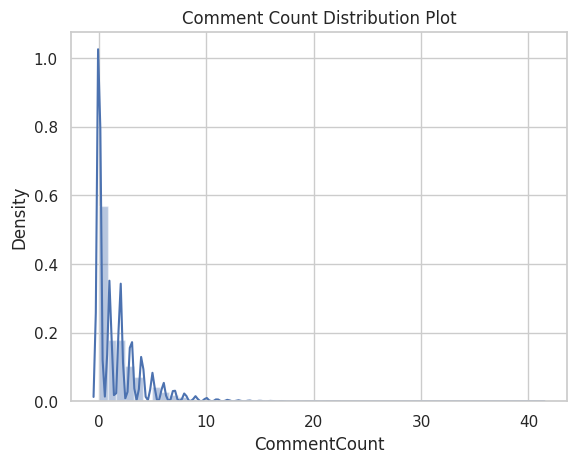

In [23]:
plt.title('Comment Count Distribution Plot')
sns.distplot(df_clean['CommentCount'])
plt.show()

<ipython-input-24-4af963afc666>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered?', y='ViewCount', data=df_subset, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_

Median ViewCount: 486.0


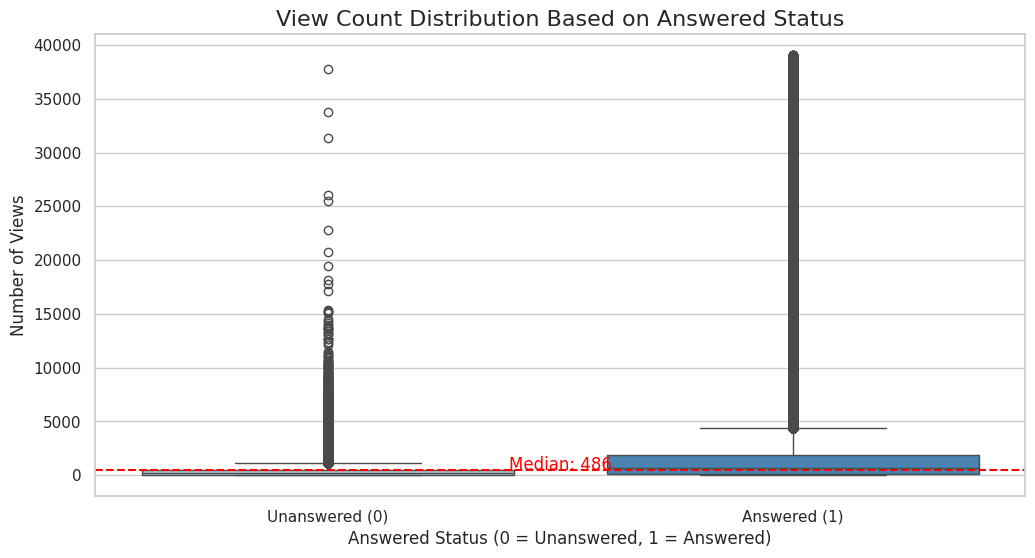

In [24]:
q99 = df_clean['ViewCount'].quantile(0.99)
df_subset = df_clean[df_clean['ViewCount'] <= q99]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(x='answered?', y='ViewCount', data=df_subset, palette='Blues')

plt.legend([], [], frameon=False)

plt.title('View Count Distribution Based on Answered Status', fontsize=16)
plt.xlabel('Answered Status (0 = Unanswered, 1 = Answered)', fontsize=12)
plt.ylabel('Number of Views', fontsize=12)

view_count_median = df_subset['ViewCount'].median()
print(f'Median ViewCount: {view_count_median}')
plt.axhline(view_count_median, color='red', linestyle='--')

plt.text(0.5, view_count_median, f'Median: {view_count_median:.0f}', color='red', ha='center')

plt.xticks([0, 1], ['Unanswered (0)', 'Answered (1)'])

plt.savefig('view_count_distribution_based_on_answered_status.png', dpi=300)

plt.show()

<ipython-input-25-aebf240038c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['ViewCount'])


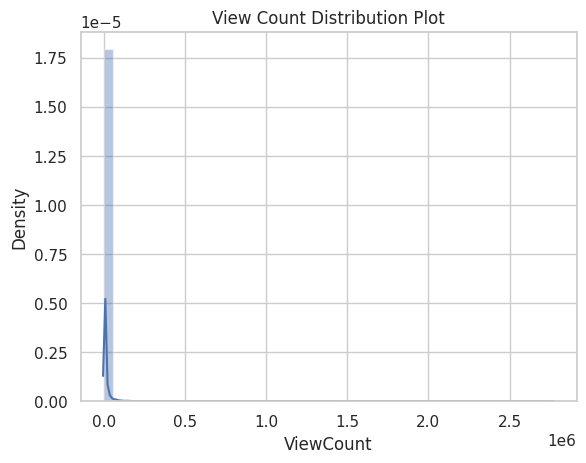

In [25]:
plt.title('View Count Distribution Plot')
sns.distplot(df_clean['ViewCount'])
plt.show()

<ipython-input-26-f43142936533>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered?', y='sqrt_question_line_count', data=df_subset, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

Median sqrt_question_line_count: 5.830951894845301


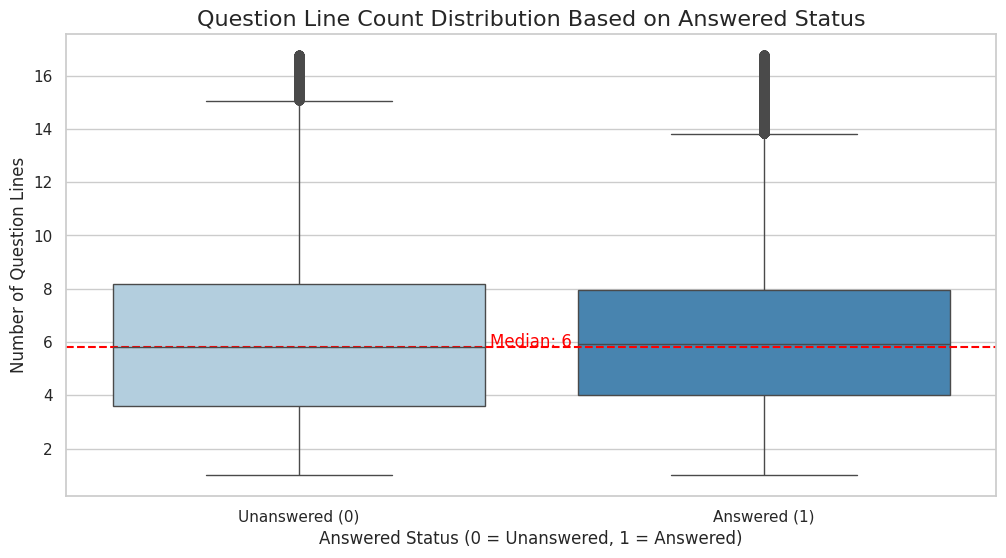

In [26]:
q99 = df_clean['sqrt_question_line_count'].quantile(0.99)
df_subset = df_clean[df_clean['sqrt_question_line_count'] <= q99]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(x='answered?', y='sqrt_question_line_count', data=df_subset, palette='Blues')

plt.legend([], [], frameon=False)

plt.title('Question Line Count Distribution Based on Answered Status', fontsize=16)
plt.xlabel('Answered Status (0 = Unanswered, 1 = Answered)', fontsize=12)
plt.ylabel('Number of Question Lines', fontsize=12)

question_line_count_median = df_subset['sqrt_question_line_count'].median()
print(f'Median sqrt_question_line_count: {question_line_count_median}')
plt.axhline(question_line_count_median, color='red', linestyle='--')

plt.text(0.5, question_line_count_median, f'Median: {question_line_count_median:.0f}', color='red', ha='center')

plt.xticks([0, 1], ['Unanswered (0)', 'Answered (1)'])

plt.savefig('question_line_count_distribution_based_on_answered_status.png', dpi=300)

plt.show()

<ipython-input-27-7b890158bf7d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['sqrt_question_line_count'])


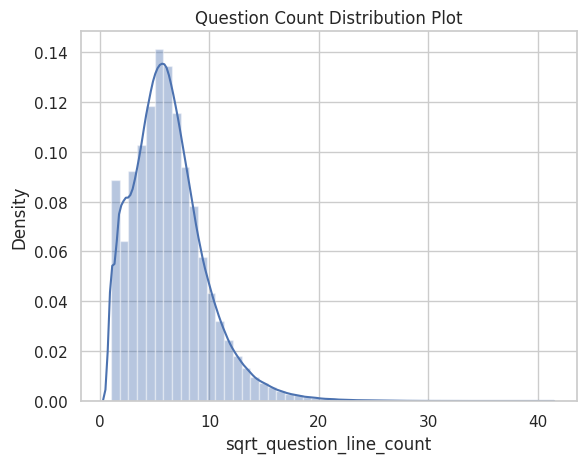

In [27]:
plt.title('Question Count Distribution Plot')
sns.distplot(df_clean['sqrt_question_line_count'])
plt.show()

<ipython-input-28-1313c9979b3a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='answered?', y='sqrt_code_line_count', data=df_subset, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

Median sqrt_code_line_count: 5.0990195135927845


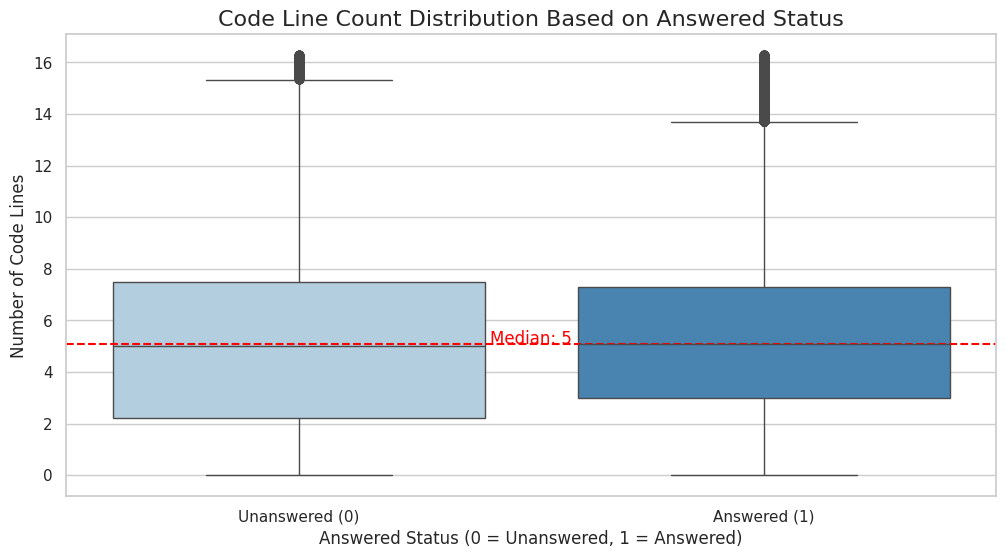

In [28]:
q99 = df_clean['sqrt_code_line_count'].quantile(0.99)
df_subset = df_clean[df_clean['sqrt_code_line_count'] <= q99]

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

sns.boxplot(x='answered?', y='sqrt_code_line_count', data=df_subset, palette='Blues')

plt.legend([], [], frameon=False)

plt.title('Code Line Count Distribution Based on Answered Status', fontsize=16)
plt.xlabel('Answered Status (0 = Unanswered, 1 = Answered)', fontsize=12)
plt.ylabel('Number of Code Lines', fontsize=12)

code_line_count_median = df_subset['sqrt_code_line_count'].median()
print(f'Median sqrt_code_line_count: {code_line_count_median}')
plt.axhline(code_line_count_median, color='red', linestyle='--')

plt.text(0.5, code_line_count_median, f'Median: {code_line_count_median:.0f}', color='red', ha='center')

plt.xticks([0, 1], ['Unanswered (0)', 'Answered (1)'])

plt.savefig('code_line_count_distribution_based_on_answered_status.png', dpi=300)

plt.show()

<ipython-input-29-409f6e793edb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean['sqrt_code_line_count'])


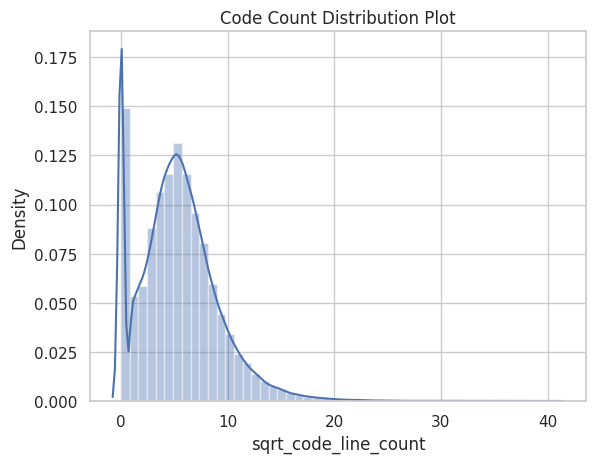

In [29]:
plt.title('Code Count Distribution Plot')
sns.distplot(df_clean['sqrt_code_line_count'])
plt.show()

In [30]:
cat_vars = ['Tags', 'ReputationCategory']

for var in cat_vars:
    cat_list = pd.get_dummies(df_clean[var], prefix=var, sparse=True)
    df_clean = df_clean.join(cat_list)

df_clean = df_clean.drop(columns=cat_vars)

print("Dataset columns after creating dummy variables: \n", df_clean.columns.values)

Dataset columns after creating dummy variables: 
 ['Id' 'CommentCount' 'ViewCount' ... 'ReputationCategory_High'
 'ReputationCategory_Low' 'ReputationCategory_Mid']


In [31]:
X = df_clean[['code_snippet', 'image', 'log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']]
y = df_clean['answered?']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X.loc[:, ['log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']] = scaler.fit_transform(
    X[['log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']]
)

<ipython-input-32-cc35801c1939>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.46593839 -0.70302539  1.46593839 ... -0.70302539 -0.70302539
 -0.70302539]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['log_Reputation', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']] = scaler.fit_transform(


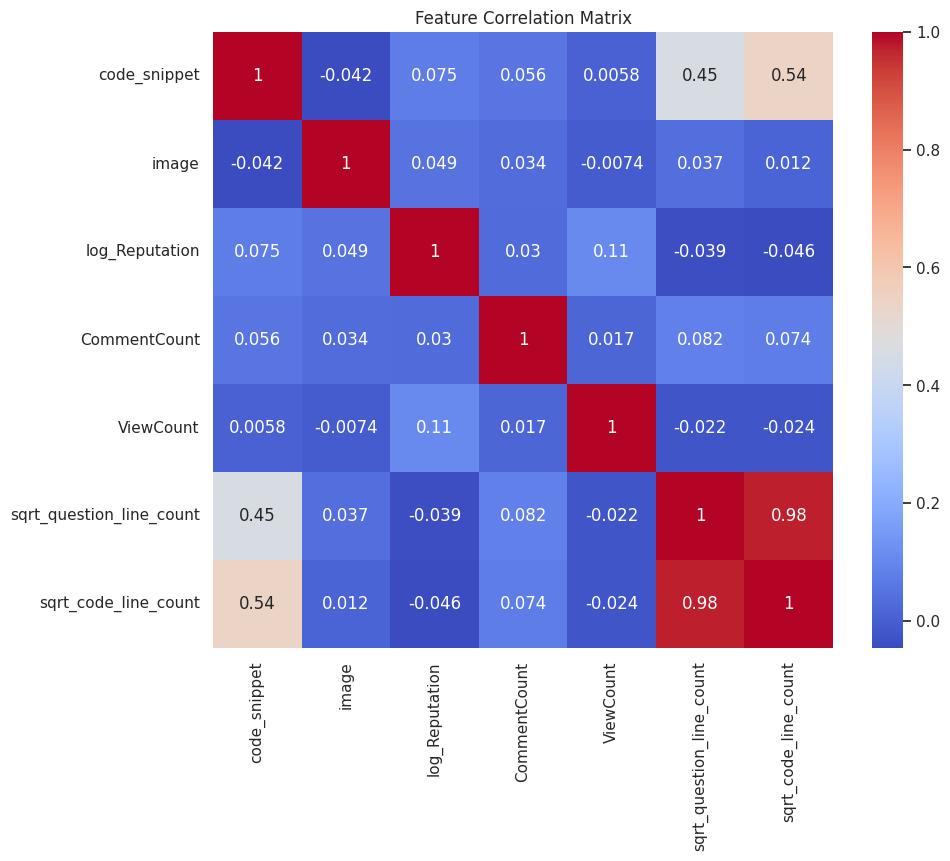

In [33]:
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [34]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

os = SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_resample(X_train, y_train)

os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['answered?'])

print("Length of oversampled data is:", len(os_data_X))
print("Number of unanswered questions in oversampled data:", len(os_data_y[os_data_y['answered?'] == 0]))
print("Number of answered questions in oversampled data:", len(os_data_y[os_data_y['answered?'] == 1]))
print("Proportion of unanswered questions in oversampled data is:", len(os_data_y[os_data_y['answered?'] == 0]) / len(os_data_X))
print("Proportion of answered questions in oversampled data is:", len(os_data_y[os_data_y['answered?'] == 1]) / len(os_data_X))

Length of oversampled data is: 601030
Number of unanswered questions in oversampled data: 300515
Number of answered questions in oversampled data: 300515
Proportion of unanswered questions in oversampled data is: 0.5
Proportion of answered questions in oversampled data is: 0.5


In [35]:
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg, n_features_to_select=5)
rfe = rfe.fit(X, y)

print("Features selected by RFE: ", X.columns[rfe.support_].tolist())
print("Feature ranking: ", rfe.ranking_)

Features selected by RFE:  ['code_snippet', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']
Feature ranking:  [1 3 2 1 1 1 1]


In [36]:
selected_columns = X.columns[rfe.support_].tolist()
X_selected = X[selected_columns]

print("Columns selected by RFE: ", selected_columns)

Columns selected by RFE:  ['code_snippet', 'CommentCount', 'ViewCount', 'sqrt_question_line_count', 'sqrt_code_line_count']


In [37]:
import statsmodels.api as sm

logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.434395
         Iterations 11
                              Results: Logit
Model:                  Logit              Method:             MLE        
Dependent Variable:     answered?          Pseudo R-squared:   0.125      
Date:                   2024-10-04 10:20   AIC:                464662.2365
No. Observations:       534820             BIC:                464751.7540
Df Model:               7                  Log-Likelihood:     -2.3232e+05
Df Residuals:           534812             LL-Null:            -2.6555e+05
Converged:              1.0000             LLR p-value:        0.0000     
No. Iterations:         11.0000            Scale:              1.0000     
--------------------------------------------------------------------------
                          Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------------
const                     2

In [38]:
odds_ratio = np.exp(result.params)
print("Odds Ratio:\n", odds_ratio)

Odds Ratio:
 const                       1.827248e+01
code_snippet                1.461751e+00
image                       9.417247e-01
log_Reputation              1.109522e+00
CommentCount                6.712369e-01
ViewCount                   4.866487e+06
sqrt_question_line_count    7.064881e-01
sqrt_code_line_count        1.365606e+00
dtype: float64


In [39]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  1403  30211]
 [  1865 126967]]


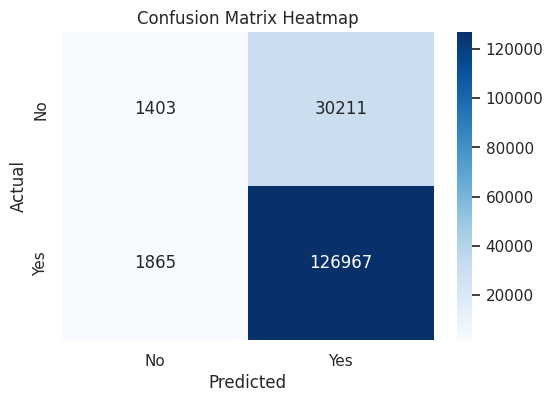

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.savefig('confusion_matrix_heatmap.png')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.04      0.08     31614
           1       0.81      0.99      0.89    128832

    accuracy                           0.80    160446
   macro avg       0.62      0.51      0.48    160446
weighted avg       0.73      0.80      0.73    160446



In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)

                    feature        VIF
0              code_snippet   1.195181
1                     image   1.152661
2            log_Reputation   1.018117
3              CommentCount   1.009478
4                 ViewCount   1.012609
5  sqrt_question_line_count  21.272748
6      sqrt_code_line_count  21.543906


Precision: 0.81
Recall: 0.99


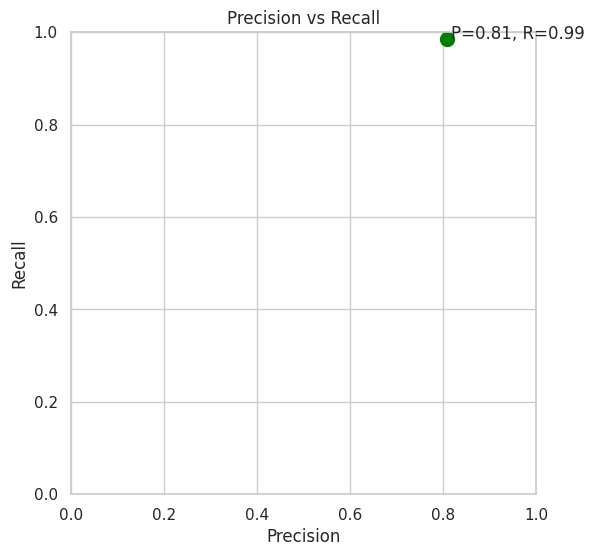

In [45]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

plt.figure(figsize=(6,6))
plt.scatter(precision, recall, color='green', s=100)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs Recall')
plt.grid(True)
plt.text(precision + 0.01, recall, f'P={precision:.2f}, R={recall:.2f}')
plt.savefig('precision_recall_scatter.png')
plt.show()

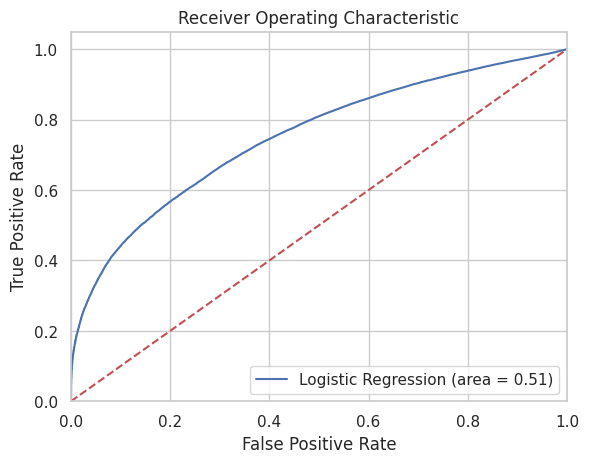

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [49]:
new_data = pd.DataFrame({
    'code_snippet': [0],
    'image': [1],
    'log_Reputation': [np.log1p(3000)],
    'CommentCount': [5],
    'ViewCount': [150],
    'sqrt_question_line_count': [np.sqrt(12)],
    'sqrt_code_line_count': [np.sqrt(20)]
})

new_pred_prob = logreg.predict_proba(new_data)[:, 1]
new_pred = [1 if x > 0.5 else 0 for x in new_pred_prob]
print("Prediction Answered?: ", new_pred)

Prediction Answered?:  [1]
